### INSTAGRAM BOT -2 

First we log in in to INSTAGRAM


In [119]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
driver = webdriver.Chrome()

In [120]:
driver.get('https://Instagram.com')
wait = WebDriverWait(driver, 5)

In [121]:
username = 'USERNAME'
password = 'PASSWORD'

In [122]:
enter_u=driver.find_element_by_name('username')
enter_p=driver.find_element_by_name('password')

enter_u.send_keys(username)
enter_p.send_keys(password)

driver.find_element_by_xpath('//button[contains(@class, "sqdOP")]/div').click()


In [124]:
driver.find_element_by_xpath('//button[contains(@class, "sqdOP")]').click()

In [125]:
driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]').click()
wait = WebDriverWait(driver, 5)

### Task 1
Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.

In [158]:
#PART 1 Begins

#Getting the list of usernames
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
#We activate the search box for taking in input
search = driver.find_element_by_class_name('XTCLo')
search.send_keys('food')

driver.implicitly_wait(10)
list = driver.find_elements_by_xpath('//a[@class="-qQT3"]')
names =[]
for i in list:
    str = i.text.split('\n')[0]
    if(str[0]=='#'):
        continue
    names.append(i.text.split('\n')[0])  

driver.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()

In [160]:
d = {}
for i in names[0:10]:
    time.sleep(1)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(i)
    driver.find_element_by_class_name('-qQT3').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="-nal3 "]')))
    #driver.implicitly_wait(100)
    time.sleep(1)
    followers = driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('title')
    followers = int(followers.replace(",", ""))
    
    d[i] = followers
    driver.implicitly_wait(10)
    
d = dict(sorted(d.items(), key=lambda item: item[1],reverse=True))
users = [*d]
reference = d
for i in range(0,5):
    print(users[i])

foodie_incarnate
delhifoodwalks
food_lunatic
skipabite
foodranchi


In [161]:
#PART 2 begins

num=[]
users = users [:5]
for i in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(i)
    waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    driver.find_element_by_class_name('-qQT3').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="-nal3 "]')))
    time.sleep(2)
    count=0
    for j in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        j.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        #Finding the time posted below the like button
        posts=driver.find_element_by_xpath('//time[contains(@class, "_1o9PC ")]').get_attribute('innerHTML')
        posts = posts.split()
        
#         print(posts)
#         print(posts[0][0])

        if(posts[1][0] in ['s','m','h']):
            count+=1
        elif (posts[1][0]=='d' and posts[0][0] in ['1','2']):
            count+=1
        else:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    num.append(count)
    
print('The number of posts made by the accounts in last 3 days are :')
for i in range (0,5):
    print(users[i],num[i])

The number of posts made by the accounts in last 3 days are :
foodie_incarnate 4
delhifoodwalks 5
food_lunatic 3
skipabite 0
foodranchi 3


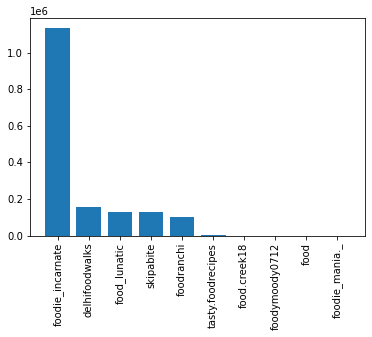

In [162]:
# Part 3 Begins

#First the graph of first 10 accounts on the basis of followers
names = [*d]
values = d.values()

plt.bar(range(len(d)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

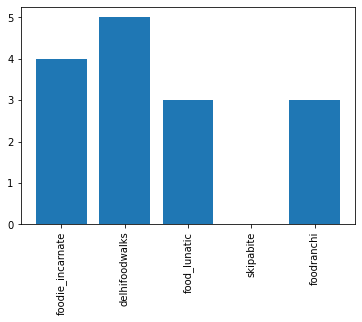

In [163]:
#Now similar graph for top 5 accounts with number of posts in last 3 days
plt.bar(range(len(users)), num, tick_label=users)
plt.xticks(rotation=90)
plt.show()

### Part 2
Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [167]:
#Part 1 and 2
content=[] #To store the captions
hashtag=[] #To store the words pointing to a link in the caption
for i in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(i)
    waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    driver.find_element_by_class_name('-qQT3').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="-nal3 "]')))
    time.sleep(2)
    flag=0 #To count the number of posts visited
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for x in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtag.append(x.get_attribute('innerHTML'))
        flag+=1
        if flag>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)

In [168]:
#PART 1

c=0
for i in content:
    print(i)
    print()
    c+=1
    if(c%10==0):
        print('--x--  --x--  --x--') #Marks end of 1 user
        print()

Desi Khaand Petha🧡🧡 One of the tastiest petha that i have eaten👌🏻👌🏻.Available at Pracheen Petha, Agra. You can order on 9760049443.#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagram #foodie #indianstreetfood #streetfood #delhistreetfood #streetfoodindia #mumbaistreetfood #delhifoodie #foodblogger #indianfoodie #bulletlover #indianfoodblogger #indianfoodbloggers #delhifood #petha #delhi #agra #mithai

Most Unique Flavours of Panipuri😱😱.Kindly watch the full video for location, price & other details🤗🤗.#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagram #foodie #indianstreetfood #streetfood #delhistreetfood #streetfoodindia #mumbaistreetfood #delhifoodie #foodblogger #indianfoodie #desikhana #indianfoodblogger #indianfoodbloggers #delhifood #mumbai #delhi #nag

In [169]:
#PART 2

#Here for words, I am not able to remove the Emojis from the words
w = {}
for i in content:
    strlist = i.split(' ')
    for j in strlist:
        chars = "!,.'.?"
        for x in chars:
            j = j.replace(x,'')
        j = j.strip()
        
        w[j] = w.get(j,0)+1
        
print(w)

{'Desi': 1, 'Khaand': 1, 'Petha🧡🧡': 1, 'One': 4, 'of': 24, 'the': 39, 'tastiest': 1, 'petha': 1, 'that': 9, 'i': 4, 'have': 4, 'eaten👌🏻👌🏻Available': 1, 'at': 6, 'Pracheen': 2, 'Petha': 2, 'Agra': 1, 'You': 1, 'can': 4, 'order': 1, 'on': 12, '9760049443#foodieincarnate': 1, '#sodelhi': 7, '#newdelhi': 6, '#foodtalkindia': 8, '#delhigram': 7, '#indianfood': 8, '#delhifoodblogger': 13, '#foodgasm': 5, '#foodporn': 6, '#foodpornshare': 4, '#foodlover': 4, '#foodgram': 4, '#foodiesofinstagram': 4, '#foodie': 7, '#indianstreetfood': 5, '#streetfood': 8, '#delhistreetfood': 6, '#streetfoodindia': 4, '#mumbaistreetfood': 5, '#delhifoodie': 6, '#foodblogger': 12, '#indianfoodie': 6, '#bulletlover': 1, '#indianfoodblogger': 12, '#indianfoodbloggers': 14, '#delhifood': 6, '#petha': 2, '#delhi': 10, '#agra': 2, '#mithai': 2, 'Most': 1, 'Unique': 1, 'Flavours': 1, 'Panipuri😱😱Kindly': 1, 'watch': 1, 'full': 7, 'video': 3, 'for': 17, 'location': 1, 'price': 2, '&': 6, 'other': 1, 'details🤗🤗#foodieinc

In [170]:
#PART 3


df = pd.DataFrame(w, columns=['Word','Frequency'])
df['Word']=w.keys()
df['Frequency']=w.values()
df.to_csv('words_freq.csv', index=False)


#The CSV file is now created in the same directory

In [171]:
#PART 4

#print(hashtag)
hashed=[] #To separate hashtags from handles
for i in hashtag:
    if not i[0]=='@' and i!='':
        hashed.append(i)
        
d={}
for i in hashed:
    d[i]=d.get(i,0)+1
    
d = dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

print('The top Hashtags used by these Instagram accounts in decreasing order are :')
for i in d:
    print(i,d[i])

The top Hashtags used by these Instagram accounts in decreasing order are :
#indianfoodbloggers 14
#reels 14
#delhifoodblogger 13
#foodblogger 12
#indianfoodblogger 12
#reelsinstagram 12
#delhi 10
#skipabite 10
#foodtalkindia 8
#indianfood 8
#streetfood 8
#desikhana 8
#foodranchi 8
#foodieincarnate 7
#sodelhi 7
#delhigram 7
#foodie 7
#newdelhi 6
#foodporn 6
#delhistreetfood 6
#delhifoodie 6
#indianfoodie 6
#delhifood 6
#trending 6
#zingyzest 6
#foodblog 6
#foodgasm 5
#indianstreetfood 5
#mumbaistreetfood 5
#dfwinuttarakhand 5
#mountains 5
#walkwithdfw 5
#walkwithanubhav 5
#delhi_igers 5
#reelitfeelit 5
#foodiesince96 5
#foodpornshare 4
#foodlover 4
#foodgram 4
#foodiesofinstagram 4
#streetfoodindia 4
#reelkarofeelkaro 4
#jaunsari 4
#jaunsarbawar 4
#festival 4
#indianfestival 4
#indianculture 4
#maghmaroj 4
#devbhoomiuttarakhand 4
#tasty 4
#instablog 4
#instagramreels 4
#mumbai 3
#Foodieincarnate 3
#delhifoodies 3
#foodstagram 3
#instadaily 3
#foodmaniacindia 3
#food 3
#desserts 3
#food

The top 5 hashtags are :
#indianfoodbloggers
#reels
#delhifoodblogger
#foodblogger
#indianfoodblogger


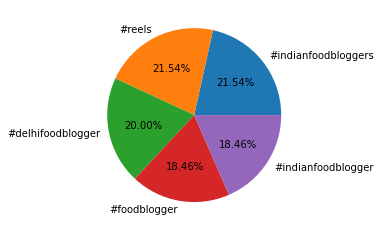

In [172]:
#PART 5
  
w = (sorted(d.items(), key=lambda item: item[1],reverse=True))
k =[]
v =[]
print('The top 5 hashtags are :')
for i in range (0,5):
    k.append(w[i][0])
    v.append(w[i][1])
    print(w[i][0])
plt.pie(v, labels=k, autopct='%.2f%%')
plt.show()

### Part 3

You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.

In [187]:
#PART 1

likes=[]
for i in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(i)
    time.sleep(1)
    #waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))
    driver.find_element_by_class_name('-qQT3').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="-nal3 "]')))
    time.sleep(2)
    flag = 0
    curr = 0
    total = 0
    print('Likes on last 10 posts of user : ',i)
    for j in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        j.click()
        driver.implicitly_wait(10)
        #It may show likes or views depending on whether post is a picture or video
        
        #One Post had hidden likes so manually removed it
        #print(i.strip(),flag,end=' ')
        try:
            if(flag == 6 and i.strip() =='foodranchi'):
                curr='0'
            else:
                curr = driver.find_element_by_xpath('//div[@class="Nm9Fw"]/a/span').get_attribute('innerHTML')
        except:
            curr = driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span/span').get_attribute('innerHTML')
        
        
        curr = int(curr.replace(',','').strip())

        print(curr,end = ' ')
        total = total + curr
        flag+=1
        if flag>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print()
    likes.append(total)


Likes on last 10 posts of user :  foodie_incarnate
10373 125760 10805 23374 98192 363705 28719 186068 183452 13313 
Likes on last 10 posts of user :  delhifoodwalks
109 593 413 650 682 175 2208 386 462 328 
Likes on last 10 posts of user :  food_lunatic
487 1148 1752 6233 28265 2433 6245 919 24782 68829 
Likes on last 10 posts of user :  skipabite
153 144 158 97 133 119 130 169 155 167 
Likes on last 10 posts of user :  foodranchi
468 5207 2917 5394 5719 4192 0 3351 1982 3333 


In [188]:
likes

[1043761, 6006, 141093, 1425, 32563]

In [189]:
#PART 2

for i in range(0,5):
    avg = likes[i]/10
    print('The average likes for handle : ',users[i],' is ',avg)

The average likes for handle :  foodie_incarnate  is  104376.1
The average likes for handle :  delhifoodwalks  is  600.6
The average likes for handle :  food_lunatic  is  14109.3
The average likes for handle :  skipabite  is  142.5
The average likes for handle :  foodranchi  is  3256.3


In [192]:
#PART 3
followers = []
ratio = []
for i in range(0,5):
    followers.append(reference[users[i]])
    ratio.append(followers[i]/likes[i])
    print('The follower:likes ratio for handle : ',users[i],' is ',ratio[i])

The follower:likes ratio for handle :  foodie_incarnate  is  1.085054911996137
The follower:likes ratio for handle :  delhifoodwalks  is  26.433066933066932
The follower:likes ratio for handle :  food_lunatic  is  0.9048074674151092
The follower:likes ratio for handle :  skipabite  is  89.58736842105263
The follower:likes ratio for handle :  foodranchi  is  3.11224395786629


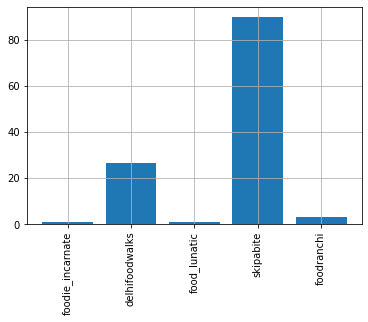

In [193]:
#PART 4

#Graph for Followes to Likes Ratio
plt.bar(users, ratio)
plt.xticks(rotation=90)
plt.grid()
plt.show()

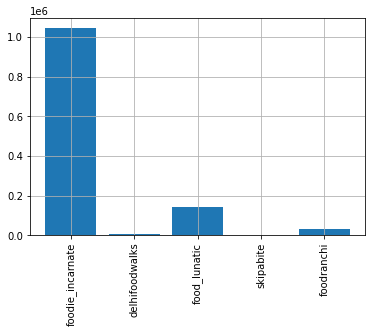

In [194]:
#Graph for average likes
plt.bar(users, likes)
plt.xticks(rotation=90)
plt.grid()
plt.show()